In [1]:
import numpy as np
import pandas as pd
import skimage.io
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from os.path import join, exists
from PIL import Image, ImageChops

In [2]:
dataset_path = "/media/matthew/External/Kaggle/PANDA_Challenge"
train_image_path = join(dataset_path, "train_images")
train_mask_path = join(dataset_path, "train_label_masks")

In [4]:
patches_rad = pd.read_csv('patches_rad.csv')
patches_kar = pd.read_csv('patches_kar.csv')

In [5]:
len(patches_rad)

471990

In [80]:
train_df = pd.read_csv(join(dataset_path, 'train.csv'), index_col='image_id')
test_df = pd.read_csv(join(dataset_path, 'test.csv'))

In [81]:
train_df.head()

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [ ]:
train_df[(train_df['data_provider'] == 'radboud') || ((train_df['data_provider'] == 'karolinska') && (train_df['']))]

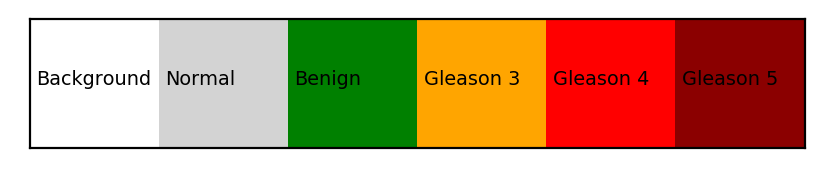

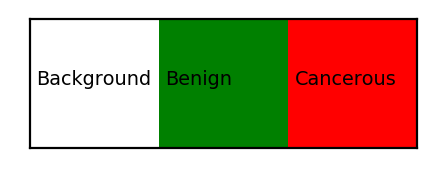

In [135]:
# Color maps

# Radboud
cmap_r = ListedColormap(['white', 'lightgrey', 'green', 'orange', 'red', 'darkred'])
norm_r = Normalize(vmin=0, vmax=5, clip=True)
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(6))], cmap=cmap_r, norm=norm_r)
plt.xticks([])
plt.yticks([])
for idx, label in enumerate(['Background', 'Normal', 'Benign', 'Gleason 3', 'Gleason 4', 'Gleason 5']):
    plt.text(idx-0.45, 0, label, fontsize='x-small')
plt.show()

# Karolinska [background, benign, cancerous]
cmap_k = ListedColormap(['white', 'green', 'red'])
norm_k = Normalize(vmin=0, vmax=2, clip=True)
plt.figure(figsize=(2.5, 2), dpi=200)
plt.imshow([list(range(3))], cmap=cmap_k, norm=norm_k)
plt.xticks([])
plt.yticks([])
for idx, label in enumerate(['Background', 'Benign', 'Cancerous']):
    plt.text(idx-0.45, 0, label, fontsize='x-small')
plt.show()

In [83]:
def crop_to_content(image, mask):
    content = np.argwhere(np.sum(image, axis=2) != 765)
    tl = np.min(content, axis=0)
    br = np.max(content, axis=0)
    return image[tl[0]:br[0]+1, tl[1]:br[1]+1], mask[tl[0]:br[0]+1, tl[1]:br[1]+1]

In [95]:
def show_image(image_id, scale_factor=10):
    image_path = join(train_image_path, image_id + '.tiff')
    mask_path = join(train_mask_path, image_id + '_mask.tiff')
    image = skimage.io.MultiImage(image_path)
    mask = skimage.io.MultiImage(mask_path)
    x, y, c = image[0].shape
    image = cv2.resize(image[0], (int(y / scale_factor), int(x / scale_factor)))
    mask = cv2.resize(mask[0], (int(y / scale_factor), int(x / scale_factor)))[:,:,0]
    image, mask = crop_to_content(image, mask)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    ax1.imshow(image)
    data_provider = train_df.loc[image_id]['data_provider']
    if data_provider == 'radboud':
        ax2.imshow(mask, cmap=cmap_r, norm=norm_r)
    else:
        ax2.imshow(mask, cmap=cmap_k, norm=norm_k)

beb35c12ff6f8649daef79766c83750e


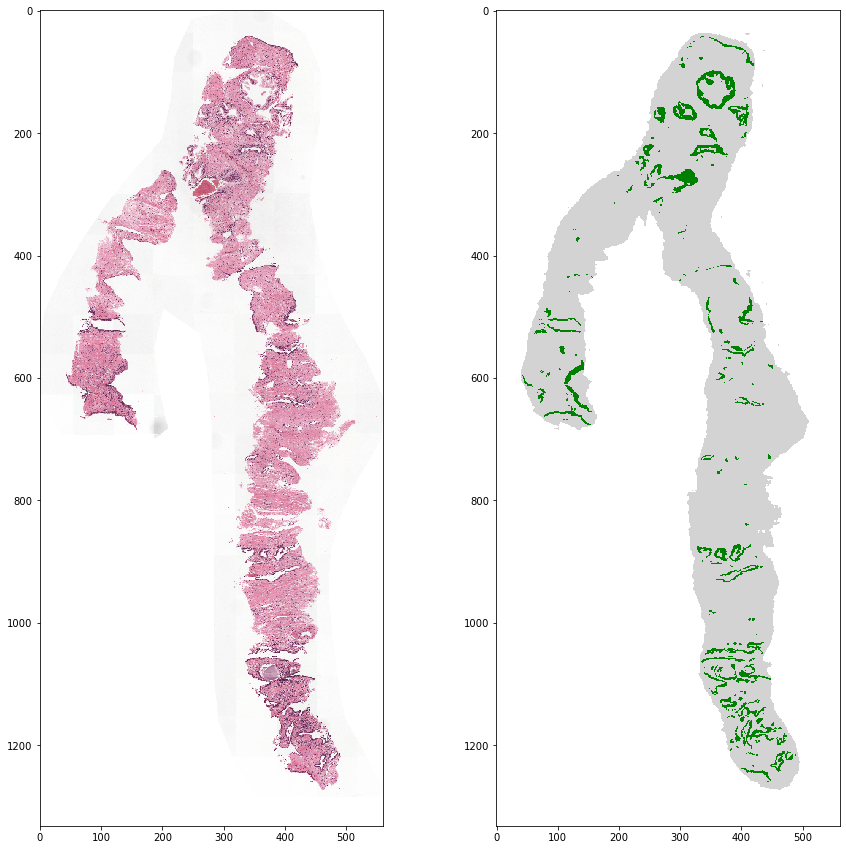

In [136]:
image_id = np.random.choice(train_df[train_df['isup_grade'] == 0].index)
print(image_id)
show_image(image_id)

In [137]:
train_df = pd.read_csv(join(dataset_path, 'train.csv'))
test_df = pd.read_csv(join(dataset_path, 'test.csv'))

In [138]:
train_df.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [142]:
train_df['data_provider'] = [x[0] for x in train_df['data_provider']]
test_df['data_provider'] = [x[0] for x in test_df['data_provider']]

In [143]:
train_df.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,k,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,k,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,r,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,k,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,k,0,0+0


In [145]:
train_df.to_csv(join(dataset_path,'train.csv'), index=False)
test_df.to_csv(join(dataset_path,'test.csv'), index=False)